In [1]:
# import modules/ api stuff
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")



In [3]:
# pull csv information and format into a usable dataframe
obesity_data = pd.read_csv("(fast_food) resources/obesity_diabetes_csv.csv")

# obesity only (not diabetes)
obesity_data = obesity_data.loc[obesity_data["Measure"] == "Obesity among adults aged >=18 years"]

# only pull neccessary columns
obesity_data = obesity_data[["LocationName", "Measure", "Data_Value", "Geolocation"]]

# split geolocation into lat and lng
lat_lon = obesity_data["Geolocation"].str.split(" ", expand=True)

# no more parenthesis
lon = lat_lon[1].str.replace("(", "")
lat = lat_lon[2].str.replace(")","")

# add lat and lng to dataframe
obesity_data['lon'] = lon
obesity_data['lat'] = lat

# get rid of geolocation (dont need it anymore)
obesity_data_cleaned = obesity_data.drop(columns=['Geolocation'])

# Display the updated DataFrame
obesity_data_cleaned

,LocationName,Measure,Data_Value,lon,lat
1,73002,Obesity among adults aged >=18 years,40.6,-97.73097606,34.94935021
3,73003,Obesity among adults aged >=18 years,34.4,-97.49717346,35.66897845
5,73004,Obesity among adults aged >=18 years,37.9,-97.905542,35.13636931
7,73005,Obesity among adults aged >=18 years,45.0,-98.23818097,35.05783297
9,73006,Obesity among adults aged >=18 years,43.1,-98.40269923,34.90892372
...,...,...,...,...,...
1275,74962,Obesity among adults aged >=18 years,42.8,-94.95251004,35.53332988
1277,74963,Obesity among adults aged >=18 years,45.9,-94.53001825,34.41852811
1279,74964,Obesity among adults aged >=18 years,43.0,-94.66423382,36.11705387
1281,74965,Obesity among adults aged >=18 years,43.1,-94.58289225,35.97503202


In [4]:
# ==================== fast food ==========================

# make a copy for fast food only
fast_food_df = obesity_data_cleaned.copy()

# params
radius = 8000
params = {
    "categories":"catering.fast_food",
    "apiKey":"aa147ce9420940fbb65ca68a76dacbae",
    "limit":20
}

# print starting message
print("Starting search...")

# iterate through rows in new copy of obesity_data_cleaned...
for index, row in fast_food_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat = row["lat"]
    lon = row["lon"]
    
    # add filter and bias to params
    params["filter"] = f"circle:{lon},{lat},{radius}"
    params["bias"] = f"proximity:{lon},{lat}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionaty
    name_address = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # find the number (len) of fast food/ restraunts...
    try:
        fast_food_df.loc[index, "# of fast food"] = len(name_address["features"][0]["properties"]["name"])
        
    except (KeyError, IndexError):
        # if there are none, set value to zero
        fast_food_df.loc[index, "# of fast food"] = 0
        
    # log the search results
    print(f"{fast_food_df.loc[index, 'LocationName']} - # of fast food/ restraunts: {fast_food_df.loc[index, '# of fast food']}")

# Display sample data
fast_food_df

Starting search...
73002 - # of fast food/ restraunts: 0.0
73003 - # of fast food/ restraunts: 10.0
73004 - # of fast food/ restraunts: 10.0
73005 - # of fast food/ restraunts: 0.0
73006 - # of fast food/ restraunts: 0.0
73007 - # of fast food/ restraunts: 6.0
73008 - # of fast food/ restraunts: 8.0
73009 - # of fast food/ restraunts: 0.0
73010 - # of fast food/ restraunts: 0.0
73011 - # of fast food/ restraunts: 0.0
73012 - # of fast food/ restraunts: 12.0
73013 - # of fast food/ restraunts: 7.0
73014 - # of fast food/ restraunts: 0.0
73015 - # of fast food/ restraunts: 0.0
73016 - # of fast food/ restraunts: 0.0
73017 - # of fast food/ restraunts: 0.0
73018 - # of fast food/ restraunts: 3.0
73020 - # of fast food/ restraunts: 14.0
73021 - # of fast food/ restraunts: 0.0
73024 - # of fast food/ restraunts: 0.0
73025 - # of fast food/ restraunts: 12.0
73026 - # of fast food/ restraunts: 0.0
73027 - # of fast food/ restraunts: 0.0
73028 - # of fast food/ restraunts: 0.0
73029 - # of fas

73626 - # of fast food/ restraunts: 0.0
73627 - # of fast food/ restraunts: 0.0
73628 - # of fast food/ restraunts: 0.0
73632 - # of fast food/ restraunts: 0.0
73638 - # of fast food/ restraunts: 0.0
73639 - # of fast food/ restraunts: 0.0
73641 - # of fast food/ restraunts: 0.0
73642 - # of fast food/ restraunts: 0.0
73644 - # of fast food/ restraunts: 9.0
73645 - # of fast food/ restraunts: 6.0
73646 - # of fast food/ restraunts: 0.0
73647 - # of fast food/ restraunts: 0.0
73650 - # of fast food/ restraunts: 0.0
73651 - # of fast food/ restraunts: 0.0
73654 - # of fast food/ restraunts: 0.0
73655 - # of fast food/ restraunts: 0.0
73658 - # of fast food/ restraunts: 0.0
73659 - # of fast food/ restraunts: 0.0
73660 - # of fast food/ restraunts: 0.0
73661 - # of fast food/ restraunts: 0.0
73662 - # of fast food/ restraunts: 0.0
73663 - # of fast food/ restraunts: 6.0
73664 - # of fast food/ restraunts: 0.0
73666 - # of fast food/ restraunts: 0.0
73667 - # of fast food/ restraunts: 0.0


74332 - # of fast food/ restraunts: 0.0
74333 - # of fast food/ restraunts: 0.0
74337 - # of fast food/ restraunts: 0.0
74338 - # of fast food/ restraunts: 0.0
74339 - # of fast food/ restraunts: 6.0
74340 - # of fast food/ restraunts: 5.0
74342 - # of fast food/ restraunts: 0.0
74343 - # of fast food/ restraunts: 0.0
74344 - # of fast food/ restraunts: 20.0
74346 - # of fast food/ restraunts: 0.0
74347 - # of fast food/ restraunts: 0.0
74349 - # of fast food/ restraunts: 5.0
74350 - # of fast food/ restraunts: 5.0
74352 - # of fast food/ restraunts: 0.0
74354 - # of fast food/ restraunts: 9.0
74358 - # of fast food/ restraunts: 6.0
74359 - # of fast food/ restraunts: 0.0
74361 - # of fast food/ restraunts: 10.0
74363 - # of fast food/ restraunts: 10.0
74364 - # of fast food/ restraunts: 0.0
74365 - # of fast food/ restraunts: 0.0
74366 - # of fast food/ restraunts: 0.0
74367 - # of fast food/ restraunts: 0.0
74368 - # of fast food/ restraunts: 0.0
74369 - # of fast food/ restraunts: 0

74930 - # of fast food/ restraunts: 0.0
74931 - # of fast food/ restraunts: 0.0
74932 - # of fast food/ restraunts: 0.0
74935 - # of fast food/ restraunts: 0.0
74936 - # of fast food/ restraunts: 0.0
74937 - # of fast food/ restraunts: 0.0
74939 - # of fast food/ restraunts: 0.0
74940 - # of fast food/ restraunts: 0.0
74941 - # of fast food/ restraunts: 0.0
74942 - # of fast food/ restraunts: 0.0
74943 - # of fast food/ restraunts: 0.0
74944 - # of fast food/ restraunts: 0.0
74945 - # of fast food/ restraunts: 0.0
74946 - # of fast food/ restraunts: 12.0
74948 - # of fast food/ restraunts: 14.0
74949 - # of fast food/ restraunts: 0.0
74951 - # of fast food/ restraunts: 0.0
74953 - # of fast food/ restraunts: 10.0
74954 - # of fast food/ restraunts: 5.0
74955 - # of fast food/ restraunts: 3.0
74956 - # of fast food/ restraunts: 11.0
74957 - # of fast food/ restraunts: 0.0
74959 - # of fast food/ restraunts: 0.0
74960 - # of fast food/ restraunts: 10.0
74962 - # of fast food/ restraunts:

,LocationName,Measure,Data_Value,lon,lat,# of fast food
1,73002,Obesity among adults aged >=18 years,40.6,-97.73097606,34.94935021,0.0
3,73003,Obesity among adults aged >=18 years,34.4,-97.49717346,35.66897845,10.0
5,73004,Obesity among adults aged >=18 years,37.9,-97.905542,35.13636931,10.0
7,73005,Obesity among adults aged >=18 years,45.0,-98.23818097,35.05783297,0.0
9,73006,Obesity among adults aged >=18 years,43.1,-98.40269923,34.90892372,0.0
...,...,...,...,...,...,...
1275,74962,Obesity among adults aged >=18 years,42.8,-94.95251004,35.53332988,0.0
1277,74963,Obesity among adults aged >=18 years,45.9,-94.53001825,34.41852811,0.0
1279,74964,Obesity among adults aged >=18 years,43.0,-94.66423382,36.11705387,0.0
1281,74965,Obesity among adults aged >=18 years,43.1,-94.58289225,35.97503202,0.0


In [5]:
# convert lat and lon to float
fast_food_df["lat"] = fast_food_df["lat"].astype(float)
fast_food_df["lon"] = fast_food_df["lon"].astype(float)

fast_food_df.dtypes

LocationName        int64
Measure            object
Data_Value        float64
lon               float64
lat               float64
# of fast food    float64
dtype: object

In [11]:
%%capture --no-display

# fast food map
fast_food_map = fast_food_df.hvplot.points(
"lon",
"lat",
geo=True,
tiles="OSM",
color='Data_Value',
size='# of fast food',
scale=1.75,
hover_cols=['LocationName', '# of fast food', 'Data_Value'])

fast_food_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lon,lat]   (Data_Value,# of fast food,LocationName)

In [7]:
# add bins/ groups for differnt ranges + average obesity rate within those ranges
bins = [0, 0.1, 5, 10, 15, 20, 25, 100]
labels = ["none",
         "1 to 5",
         "6 to 10",
         "11 to 15",
         "16 to 20",
         "21 to 25",
         "25 +"]

fast_food_sliced = pd.cut(fast_food_df["# of fast food"], bins,
                         labels=labels, include_lowest=True)

fast_food_df["bins"] = fast_food_sliced
print(fast_food_df["# of fast food"].mean())
fast_food_df

3.1386292834890965


,LocationName,Measure,Data_Value,lon,lat,# of fast food,bins
1,73002,Obesity among adults aged >=18 years,40.6,-97.730976,34.949350,0.0,none
3,73003,Obesity among adults aged >=18 years,34.4,-97.497173,35.668978,10.0,6 to 10
5,73004,Obesity among adults aged >=18 years,37.9,-97.905542,35.136369,10.0,6 to 10
7,73005,Obesity among adults aged >=18 years,45.0,-98.238181,35.057833,0.0,none
9,73006,Obesity among adults aged >=18 years,43.1,-98.402699,34.908924,0.0,none
...,...,...,...,...,...,...,...
1275,74962,Obesity among adults aged >=18 years,42.8,-94.952510,35.533330,0.0,none
1277,74963,Obesity among adults aged >=18 years,45.9,-94.530018,34.418528,0.0,none
1279,74964,Obesity among adults aged >=18 years,43.0,-94.664234,36.117054,0.0,none
1281,74965,Obesity among adults aged >=18 years,43.1,-94.582892,35.975032,0.0,none


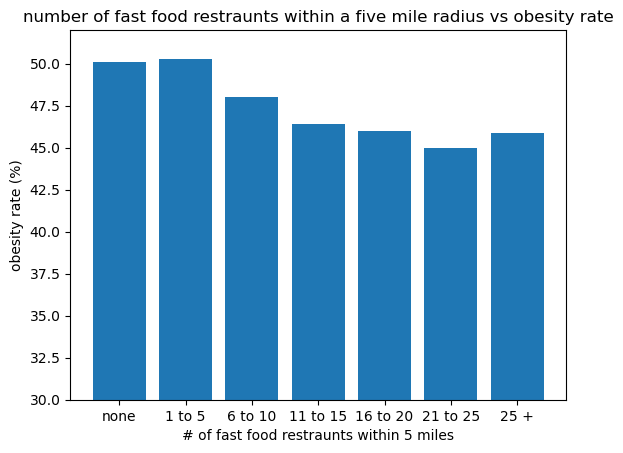

In [9]:
# bar graph 
plt.bar(fast_food_df["bins"].sort_values(), fast_food_df["Data_Value"], data= labels)
plt.title("number of fast food restraunts within a five mile radius vs obesity rate")
plt.ylabel("obesity rate (%)")
plt.xlabel("# of fast food restraunts within 5 miles")
plt.ylim(30, 52)

# save graph to resources folder
plt.savefig('(fast_food) resources/bar_graph.png')
plt.show()

In [10]:
# ANOVA test

group1 = fast_food_df[fast_food_df["bins"] == "none"]["Data_Value"]
group2 = fast_food_df[fast_food_df["bins"] == "1 to 5"]["Data_Value"]
group3 = fast_food_df[fast_food_df["bins"] == "6 to 10"]["Data_Value"]
group4 = fast_food_df[fast_food_df["bins"] == "11 to 15"]["Data_Value"]
group5 = fast_food_df[fast_food_df["bins"] == "16 to 20"]["Data_Value"]
group6 = fast_food_df[fast_food_df["bins"] == "21 to 25"]["Data_Value"]
group7 = fast_food_df[fast_food_df["bins"] == "25 +"]["Data_Value"]

st.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=10.331597928295132, pvalue=6.1512105797246e-11)